# Homework 4:  Linear models

This homework assignment is designed to give you practice with linear models and the bias-variance tradeoff. 

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 


This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

---
## 1. Loading the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file. 

Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`), Flanker Task performance (`Flanker_Unadj`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame. 

In [1]:
options(warn=-1)

setwd("~/Documents/GitHub/Goldberg_DSPN_S22/hcp_data")
HCP_practice_df <- read.csv("unrestricted_trimmed_1_7_2020_10_50_44.csv")
# head(HCP_practice_df)

library(tidyverse)
HCP_practice_df %>% select(Subject, Gender, Flanker_Unadj, FS_Tot_WM_Vol, FS_Total_GM_Vol) %>%
drop_na() -> d1

head(d1)
range(d1$Flanker_Unadj) ## running this because I bring it up in question 5. 



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



,Subject,Gender,Flanker_Unadj,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<chr>,<dbl>,<int>,<int>
1,100206,M,130.42,543134,807245
2,100307,F,112.56,407292,664124
3,100408,M,121.18,500417,726206
4,100610,M,126.53,512946,762308
5,101006,F,101.85,429449,579632
6,101107,M,107.04,416995,665024


[1]  84.90 142.11

---
## 2. Initial data visualization (2 point)

Use the `pairs` function to look at all the pairwise scatterplots of the variables in `d1`. Describe which variables seem positively correlated, negatively correlated, or not correlated at all.

,M
F,0
M,1


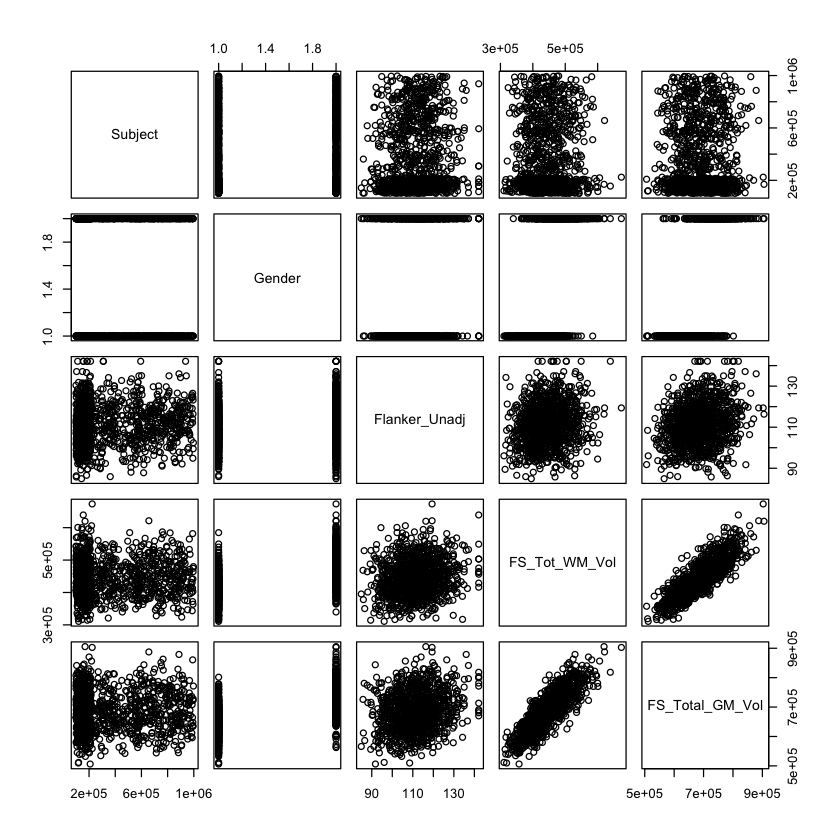

In [2]:
d1$Gender <- as.factor(d1$Gender)
contrasts(d1$Gender)
pairs(d1)

Based on visual inspection alone, the following variables appear to be positively correlated: 

* Total cortical white matter volume and total gray matter volume

The following variables appear to have no clearly defined relationship: 
* Subject and unadjusted flanker inhibitory control and attention score
* Subject and total cortical white matter volume
* Subject and total gray matter volume
* Flanker inhibitory control and attention score and total cortical white matter volume
* Flanker inhibitory control and attention score and total gray matter volume

Given that gender is comprised of a binarized outcome, linear relationship is difficult to explore. Generally it appears that subject and flanker inhibitory control and attention score are spread evenly across genders. Though difficult to see using this visualization, it does appear that women tended to have smaller white and gray matter volumes (this makes sense given known differences in brain volume across sex). 

The seemingly strong positive correlation between white and gray matter is also supported by existing knowledge - larger gray matter will require more white matter tracts. 

Importantly, the behavioral measure (flanker inhibitory control and attention score) does not appear to have overt relationships with the other 4 variables included in the data frame. 


---
## 3. Linear regression (4 points)

Use the `lm` (linear model) function to determine the association between Flanker Task performance and total grey matter volume from the `d1` data frame.

$$
Y_{flanker} = \beta_0 + \beta_1 X_{GM volume}
$$

Show the results using the `summary` function, and report the mean coefficient values for $beta_0$ \& $\beta_1$ (`coef` function) and their 95\% confidence intervals (`confint` function). Is grey matter volume significantly associated with Flanker Task performance?

In [3]:
HCP_model1 <- lm(Flanker_Unadj ~ FS_Total_GM_Vol, data = d1)
summary(HCP_model1)

coef(HCP_model1)  ## the values produced here corroborate the estimate volues presented in the model summary 

confint(HCP_model1)




Call:
lm(formula = Flanker_Unadj ~ FS_Total_GM_Vol, data = d1)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.2280  -6.5969  -0.0119   6.5497  31.0108 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     9.026e+01  3.041e+00  29.677  < 2e-16 ***
FS_Total_GM_Vol 3.110e-05  4.412e-06   7.048 3.18e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.864 on 1111 degrees of freedom
Multiple R-squared:  0.0428,	Adjusted R-squared:  0.04194 
F-statistic: 49.68 on 1 and 1111 DF,  p-value: 3.177e-12


(Intercept) FS_Total_GM_Vol 
   9.025646e+01    3.109965e-05

,2.5 %,97.5 %
(Intercept),8.428917e+01,9.622375e+01
FS_Total_GM_Vol,2.244198e-05,3.975733e-05


The mean coefficient value for the intercept(B_0) is equal to 90.26 units. The mean coefficient value for X_1 (total gray matter volume) is 0.00003. 

The 95% confidence interval for the intercept is [84.29, 96.22]
The 95% confidence interval for X_1 (total gray matter volume) is [0.000022, 0.000040]

Based on the model output, grey matter volume is significantly associated with Flanker Task performance, such that for a 1 unit increase in Flanker Task performance, gray matter increases by 3.11e-05 units (p<0.001***). 

---
## 4. Plotting (2 points)

Use `ggplot` to plot the `FS_Total_GM_Vol` variable (x axis) against the `Flanker_Unadj` variable (y axis), as well as the regression line with confidence intervals on the regrssion line. Qualitatively describe what you see. 

`geom_smooth()` using formula 'y ~ x'



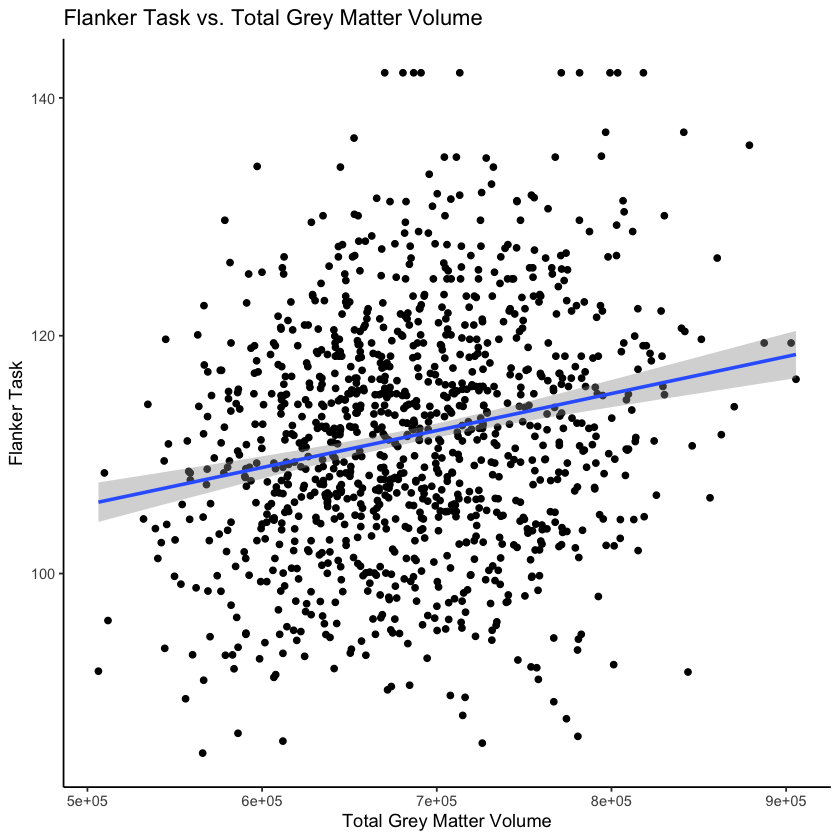

In [5]:
library(ggplot2)

ggplot(d1, aes(x=FS_Total_GM_Vol, y=Flanker_Unadj)) + geom_point() + geom_smooth(method='lm', se = TRUE) + 
labs(title = "Flanker Task vs. Total Grey Matter Volume", x = "Total Grey Matter Volume",y = "Flanker Task") +
theme_classic()



In plotting the total grey matter volume variable against the Flanker test performance, qualitatively I see a decently weak positive relationship, suggesting a modest increase in Flanker task score as total grey matter volume scales up.

---

## 5. Reflection (1 point)

What do you conclude based on the analyses above?

Despite total grey matter volume serving as a significant predictor in the model (p < 0.001), there are several pieces of information that suggest a weak relationship between total grey matter and the dependent variable, Flanker Task performance. First, the model estimate is marginal - a 1 unit increase in Flanker Task performance is associated with a 3.1105e-05 unit increase in total grey matter volume ( which I imagine is measured in mm cubed). Per the lm model output, the RSE might be considered relatively small - we know the RSE is scaled by the Y axis, which ranges from 84.9 to 142.11 units. Furthermore the R-squared value is also quite small (scales from 0 to 1). The scatterplot continues to corroborate a story such that grey matter volume and Flanker Task performance are not robsutly associated. Thus, I believe that the model fit is poor in this situation. Perhaps adding other variables to the model (not randomly, with a priori motivation) would improve model fit and the overall picture (e.g. perhaps with other factors in the model, total grey matter would no longer be significant), however given the scatterplots generated with the pairs() function above, it really does not appear that any of the 4 predictors of interest were associated with Flanker Task performance. 

**DUE:** 5pm EST, March 4, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.

The future Dr. Monique Tardif, auditory neuroscientist and avid cat-lover.